# Feature Selection




### Importing the libaries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

### Load the Data
This is the data we cleaned and imputed missing values for. The data was saved as "df_clean.csv"

In [2]:
df = pd.read_csv("../Capstone2/dataset_wrangled/df_clean.csv")

In [3]:
df.head()

,symbol,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Treasury Stock,target,EPS,Shares Outstanding,ROTA,Debt-Equity Ratio,FCF,P/E,P/BV,P/S
0,K,1.432000e+09,-50000000.0,4000000.0,51.0,-637000000.0,6.260000e+08,2.730000e+08,112000000.0,105000000.0,...,-2.999000e+09,0,4.98,3.628514e+08,0.183598,3.365021,2.444000e+09,12.244980,6.241658,1.495854
1,SWK,2.772400e+09,-500000.0,-7800000.0,7.0,-340300000.0,4.878600e+09,4.962000e+08,-101900000.0,442300000.0,...,-1.454400e+09,0,3.16,1.486392e+08,0.045219,1.431918,1.208300e+09,25.636077,1.770983,1.105768
2,AAP,2.609239e+09,-32428000.0,2698000.0,26.0,-195757000.0,5.312930e+08,1.112471e+09,-203513000.0,7000.0,...,-1.078900e+08,1,5.36,7.308918e+07,0.119145,2.670199,7.410070e+08,20.507462,5.298731,1.237172
3,AVY,1.477200e+09,-136000000.0,-36600000.0,14.0,-129200000.0,8.123000e+08,3.516000e+08,-75900000.0,124100000.0,...,-1.172200e+09,0,2.19,9.735160e+07,0.092591,2.089800,4.488000e+08,23.050228,3.293331,0.800376
4,CERN,3.765790e+08,-9599000.0,12042000.0,13.0,-352877000.0,8.128530e+08,2.023770e+08,-8111000.0,3443000.0,...,-2.825100e+07,0,1.16,3.434086e+08,0.143485,0.293813,1.048742e+09,47.913795,6.025466,6.557301


In [4]:
# Setting stock 'tickers' as the index of the dataframe
df = df.set_index('symbol')

In [5]:
# Convert scientific notation to decimal notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
df.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,...,Treasury Stock,target,EPS,Shares Outstanding,ROTA,Debt-Equity Ratio,FCF,P/E,P/BV,P/S
symbol,,,,,,,,,,,,,,,,,,,,,
K,1432000000.00,-50000000.00,4000000.00,51.00,-637000000.00,626000000.00,273000000.00,112000000.00,105000000.00,8689000000.00,...,-2999000000.00,0,4.98,362851405.62,0.18,3.37,2444000000.00,12.24,6.24,1.50
SWK,2772400000.00,-500000.00,-7800000.00,7.00,-340300000.00,4878600000.00,496200000.00,-101900000.00,442300000.00,6985800000.00,...,-1454400000.00,0,3.16,148639240.51,0.05,1.43,1208300000.00,25.64,1.77,1.11
AAP,2609239000.00,-32428000.00,2698000.00,26.00,-195757000.00,531293000.00,1112471000.00,-203513000.00,7000.00,3241668000.00,...,-107890000.00,1,5.36,73089179.10,0.12,2.67,741007000.00,20.51,5.30,1.24
AVY,1477200000.00,-136000000.00,-36600000.00,14.00,-129200000.00,812300000.00,351600000.00,-75900000.00,124100000.00,4502300000.00,...,-1172200000.00,0,2.19,97351598.17,0.09,2.09,448800000.00,23.05,3.29,0.80
CERN,376579000.00,-9599000.00,12042000.00,13.00,-352877000.00,812853000.00,202377000.00,-8111000.00,3443000.00,514722000.00,...,-28251000.00,0,1.16,343408620.69,0.14,0.29,1048742000.00,47.91,6.03,6.56


# Addressing Multicollinearity
Multicollinearity occurs when there are two or more variables that are highly correlated with each other. These variables are explaining each other as well as obscuring the interpretability of the model, which resuls in unclear estimates on the effects of each indivdual feature on the target variable

To address multicollinearity, we can use two techniques:
1. Variance Inflation Factor (VIF)
    * useful tool for identifying which predictors exhibit high correlation with each other
    * measures how much the variance of a predictor is inflated by its correlation with other predictors.
    * a high VIF indicates that the associated
2. Pairwise Correlation visualized w/ a heatmap

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i)
                   for i in range(len(df.columns))]

C:\Users\Mateo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [8]:
vif_data.sort_values(by='VIF', ascending=False).head(20)


,feature,VIF
33,Net Cash Flow-Operating,inf
75,FCF,inf
4,Capital Expenditures,inf
67,Total Liabilities & Equity,inf
66,Total Liabilities,inf
65,Total Equity,inf
62,Total Assets,2379294.40
13,Earnings Before Interest and Tax,471417.84
14,Earnings Before Tax,369633.26
35,Net Cash Flows-Investing,107052.70


In [9]:
vif_data[vif_data['VIF'] > 10]

,feature,VIF
0,Accounts Payable,189.51
1,Accounts Receivable,10.81
2,Add'l income/expense items,31.46
3,After Tax ROE,277.64
4,Capital Expenditures,inf
...,...,...
69,Treasury Stock,210.48
72,Shares Outstanding,21.73
74,Debt-Equity Ratio,15.64
75,FCF,inf


A VIF cut off of [4 to 10](https://online.stat.psu.edu/stat462/node/180/) is common. We see that that almost all our predictors (70 total) have VIFs above 10, indicating our predictors suffer from multicollinearity. In the cells below, we will remove variables with the help of heatmaps.

# Correlation with Target Variable
Since there are many variables in the dataset, I will take the top most correlated features with the target variable--determined by a threshold. The threshold will be set to 0.09

**Limitations:** 
- when selecting features, it would be helpful to consult an domain expert to learn which features to keep. 
- The threshold is arbitrary. 

In [10]:
correlation= pd.DataFrame(df.corr()['target'].abs().sort_values(ascending=False))[:40]
correlation

,target
target,1.00
FCF,0.14
Net Cash Flow-Operating,0.14
Depreciation,0.14
Total Equity,0.13
Earnings Before Interest and Tax,0.13
Net Income,0.13
Net Income Applicable to Common Shareholders,0.12
Fixed Assets,0.12
Capital Expenditures,0.12


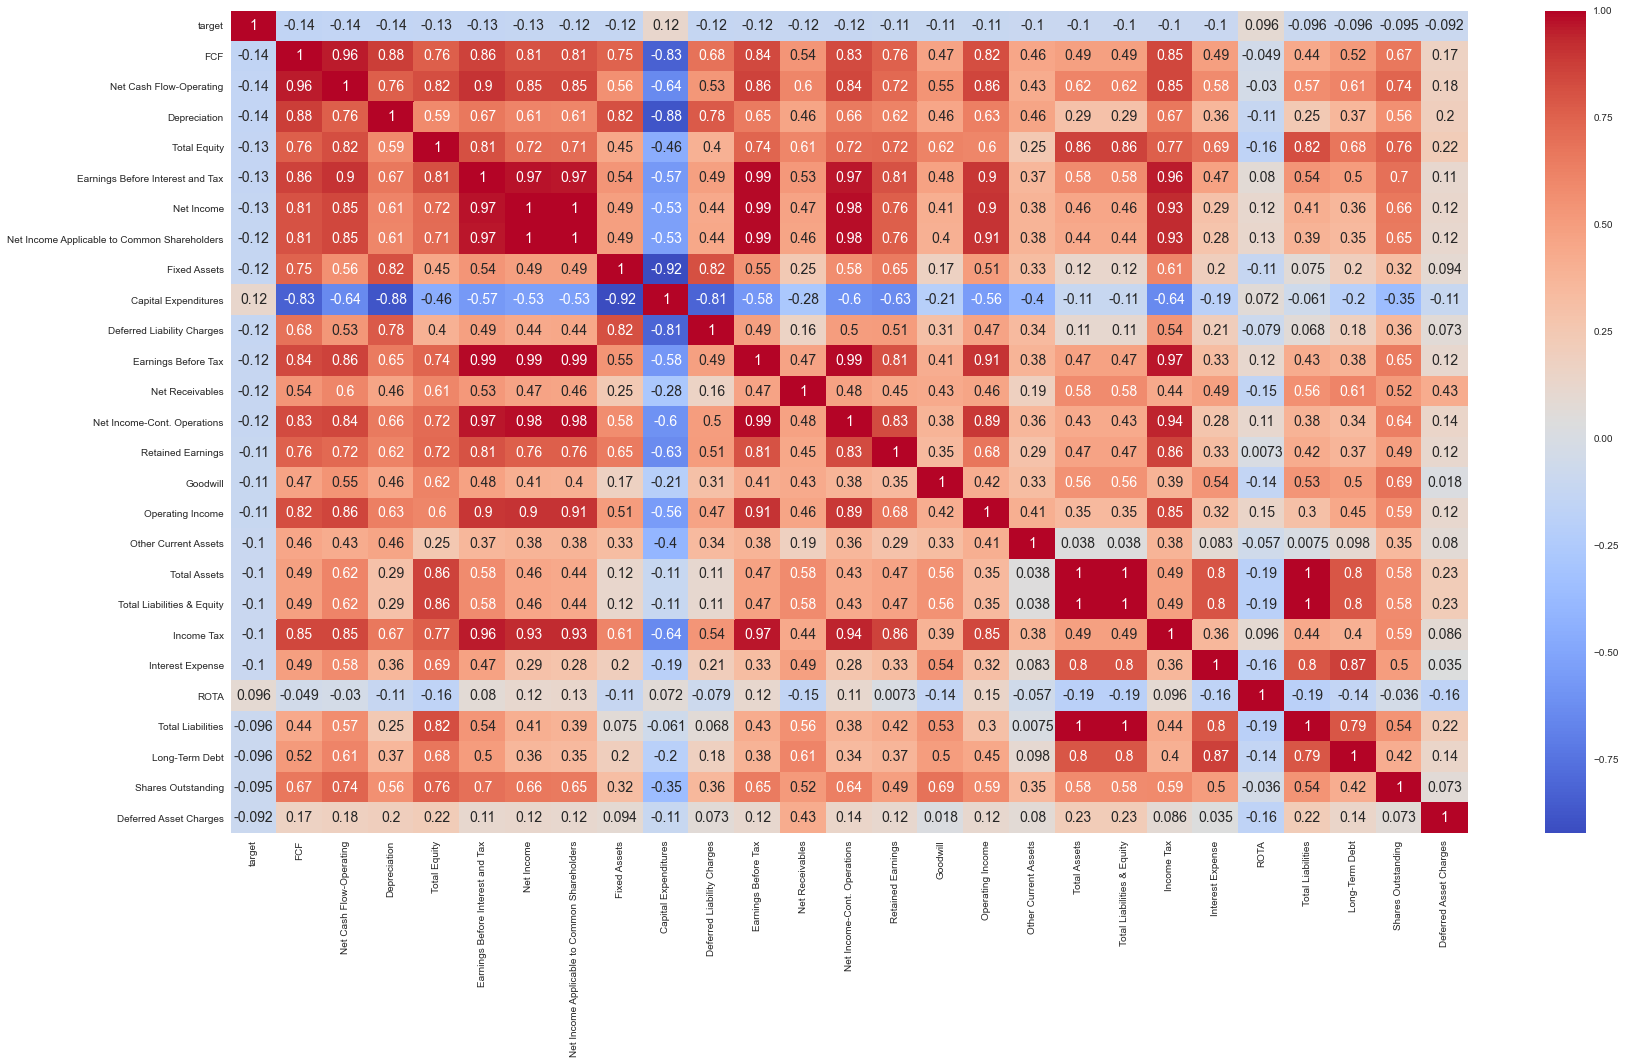

In [40]:
mask = correlation[correlation['target'] >=.09]
correlation_target= df[mask.index]

plt.figure(figsize=(25,15))
sns.heatmap(correlation_target.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()

plt.savefig('images/heatmap of correlations')

# Analysis:
Analyzing the heatmap shows that some of the variables are highly correlated with each other, further supporting the results we found throug VIF. Highly correlated variables could lead to problems of multicollinearity. We will reduce the number of features to address this problem. This process is also useful for feature selection to reduce the number of dimensions. We will remove predictor pairs with correlation coefficients above an absolute value of .8.

In order to make it easier to work with the heatmap, lets subset the variables again to only find those variables with at least 0.8 pearson correlation

**Correlation Matrix of only Variables above 0.8 correlation**

In [12]:
# Absolute values of correlation matrix
corr_matrix = correlation_target.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
high_corr = [column for column in upper.columns if any(upper[column] >= 0.8)]

df_multi = corr_matrix[high_corr]

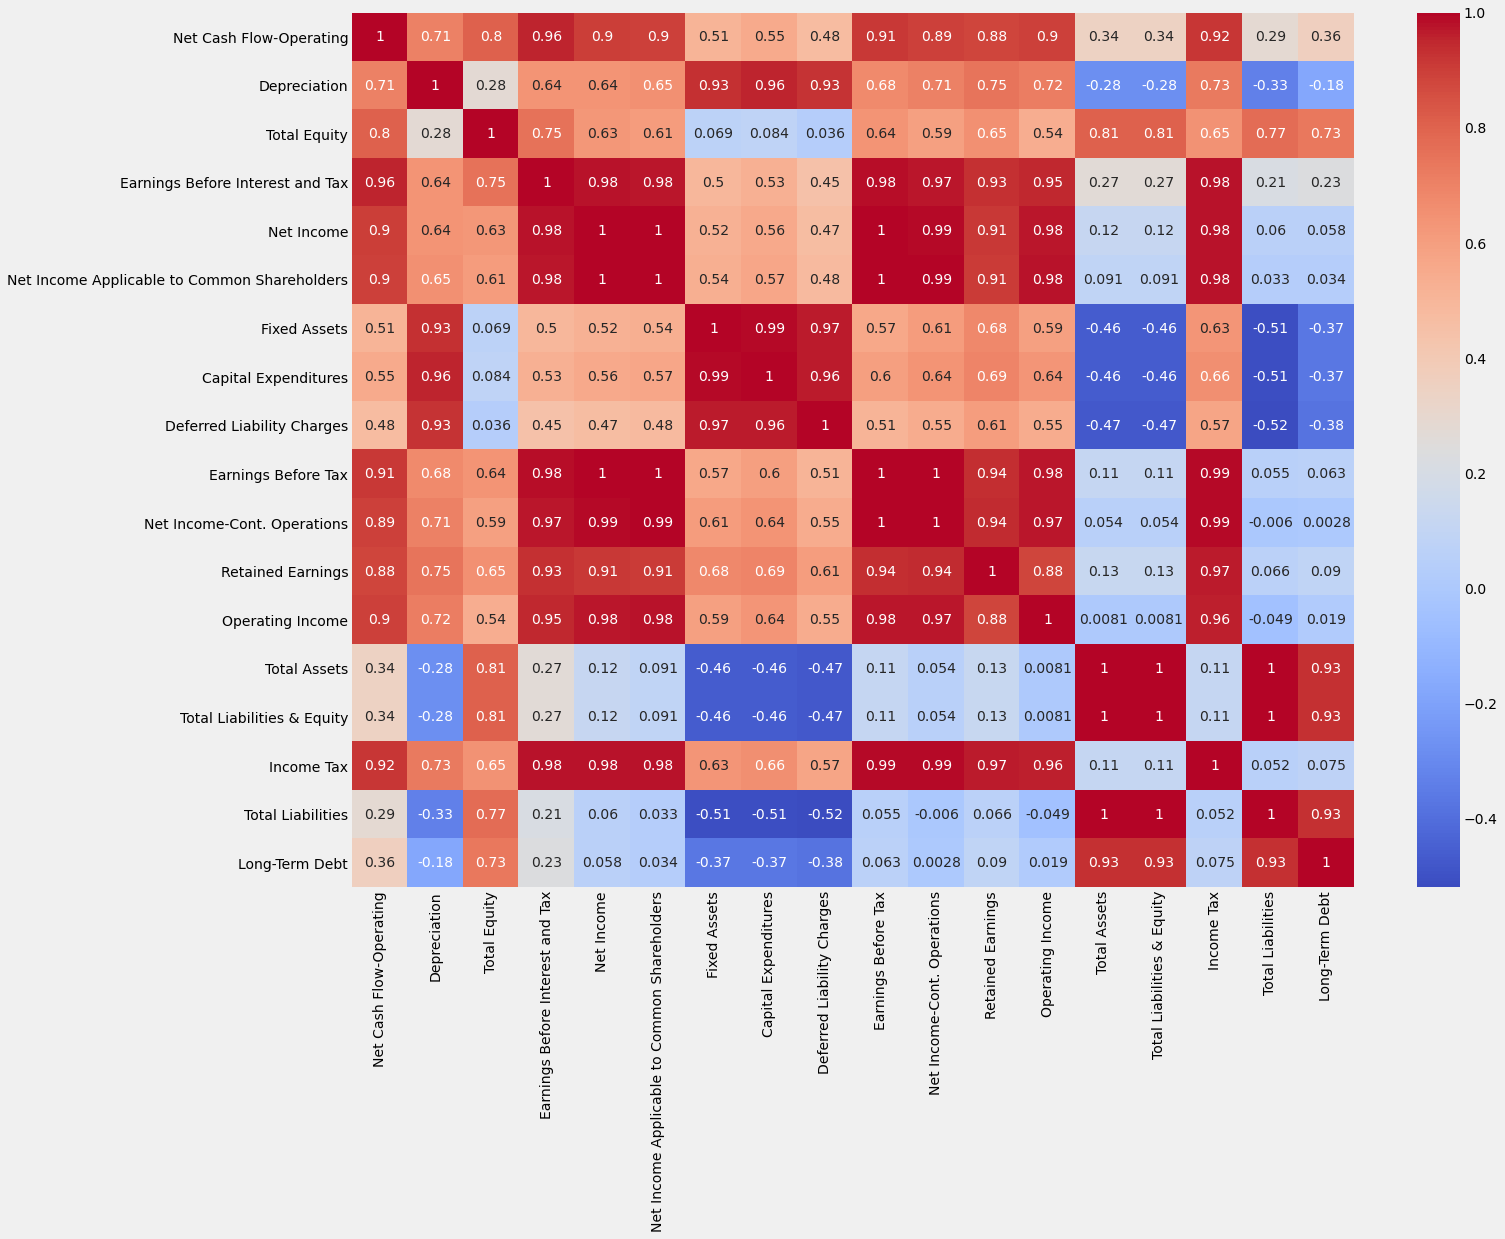

In [13]:
# Correlation matrix with heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_multi.corr(), annot=True, cmap='coolwarm')

In [17]:
# List of variables to drop due to multicollinearity
drop_features =[ 'Earnings Before Interest and Tax','Earnings Before Tax', 'Retained Earnings',
                'Net Income-Cont. Operations', 'Net Income Applicable to Common Shareholders',
                'Depreciation', 'Fixed Assets', 
                'Deferred Liability Charges', 'Income Tax', 'Capital Expenditures',
               'Total Assets','Net Cash Flow-Operating', 'Operating Income', 'Total Equity',
               'Net Income', 'Interest Expense', 
               'Total Liabilities', 'Long-Term Debt']


Check to see if any highly correlated variables remain

In [18]:
df_corr_reduced = correlation_target.copy()
df_corr_reduced = df_corr_reduced.drop(drop_features, axis=1)

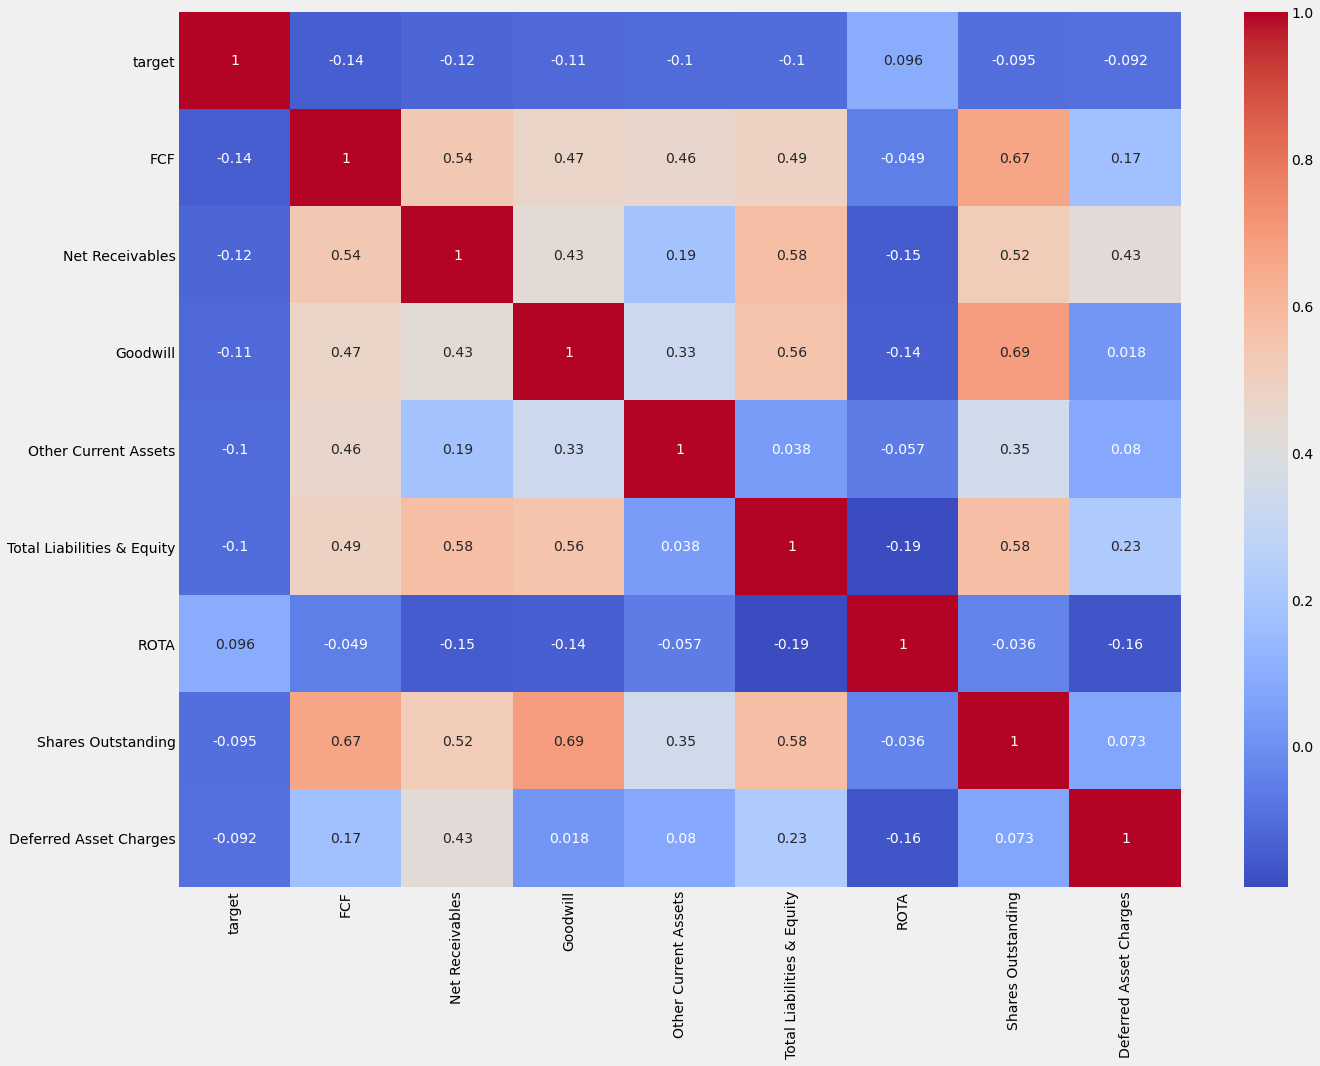

In [19]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr_reduced.corr(), annot=True, cmap='coolwarm')

# Feature Selection: SelectKBest and Mutual Information
SelectKBest scores the features through a user chosen function. We will use mutual information as our scoring function. Mutual information is not concerned whether the association between a feature and target variable is linear or not.
More information about mutual information can be found [here](https://medium.com/@hertan06/which-features-to-use-in-your-model-350630a1e31c)

In [20]:
X = df.drop(['target'], axis=1)
y = df['target']

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=30)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
top = featureScores.nlargest(30,'Score')
print(top)

                                           Feature  Score
33                         Net Cash Flow-Operating   0.08
4                             Capital Expenditures   0.08
45                            Other Current Assets   0.06
35                        Net Cash Flows-Investing   0.06
0                                 Accounts Payable   0.06
50                               Other Liabilities   0.05
40                                 Net Receivables   0.04
24                                       Inventory   0.04
13                Earnings Before Interest and Tax   0.04
2                       Add'l income/expense items   0.04
17                                    Fixed Assets   0.04
29                               Minority Interest   0.04
74                                             FCF   0.03
36                                      Net Income   0.03
66                               Total Liabilities   0.03
71                              Shares Outstanding   0.03
53            

In [22]:
mask = list(top['Feature'].values)
mask.append('target')

df_mutual_info = df[mask]
df_mutual_info.head()

,Net Cash Flow-Operating,Capital Expenditures,Other Current Assets,Net Cash Flows-Investing,Accounts Payable,Other Liabilities,Net Receivables,Inventory,Earnings Before Interest and Tax,Add'l income/expense items,...,Other Equity,Depreciation,Other Investing Activities,Total Revenue,Net Income Applicable to Common Shareholders,Other Current Liabilities,Cost of Revenue,EPS,Net Borrowings,target
symbol,,,,,,,,,,,,,,,,,,,,,
K,1807000000.00,-637000000.00,322000000.00,-641000000.00,1432000000.00,774000000.00,1424000000.00,1248000000.00,2841000000.00,4000000.00,...,-936000000.00,532000000.00,2000000.00,14792000000.00,1807000000.00,1375000000.00,8689000000.00,4.98,81000000.00,0
SWK,868000000.00,-340300000.00,468600000.00,-1198400000.00,2772400000.00,1719500000.00,1578500000.00,1473300000.00,747700000.00,-7800000.00,...,-552200000.00,441300000.00,-861700000.00,10889500000.00,490300000.00,61000000.00,6985800000.00,3.16,813200000.00,0
AAP,545250000.00,-195757000.00,42761000.00,-362107000.00,2609239000.00,231116000.00,277595000.00,2556557000.00,663016000.00,2698000.00,...,3683000.00,207795000.00,-166350000.00,6493814000.00,391758000.00,154630000.00,3241668000.00,5.36,445679000.00,1
AVY,319600000.00,-129200000.00,126200000.00,339400000.00,1477200000.00,476400000.00,1119900000.00,494100000.00,426900000.00,-36600000.00,...,-281100000.00,204600000.00,468500000.00,6140000000.00,213200000.00,0.00,4502300000.00,2.19,-187200000.00,0
CERN,695865000.00,-352877000.00,175488000.00,-688429000.00,376579000.00,0.00,674540000.00,32299000.00,588054000.00,12042000.00,...,-13429000.00,263538000.00,-299331000.00,2910748000.00,398354000.00,209746000.00,514722000.00,1.16,-24700000.00,0


## Save the Data

In [23]:
df_corr_reduced.to_csv("../Capstone2/dataset_wrangled/selection_correlation.csv")

In [24]:
df_mutual_info.to_csv("../Capstone2/dataset_wrangled/selection_kbest.csv")